# Analysis of Content Similarity for Mindtools Top-level Skills

Questions to answer:
- how does the distribution of similarity scores look like, per skill, per provider?
- are the best ranked results per skill actually good results?

## Prerequisites

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

Source:
- https://djeeny.slack.com/archives/C03H2U60TBQ/p1661266257388829
- https://djeeny.slack.com/files/U02EKSHU69L/F03UT02C6RH/mindtools_content_similarity_pruned.xlsx

In [5]:
df = pd.read_excel('./data/mindtools_experiments/mindtools_content_similarity_hbr.xlsx')

skills_df = df.drop(columns=['title', 'uuid', 'url', 'provider'])

## Data Analysis

### Basic Statistics

hbr    2932
Name: provider, dtype: int64


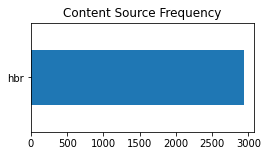

In [6]:
print(df.provider.value_counts())
df.provider.value_counts().plot.barh(title="Content Source Frequency", figsize=(4,2));

### Similarity Score Distribution

trying to reproduce https://djeeny.slack.com/archives/C03H2U60TBQ/p1660904788086569

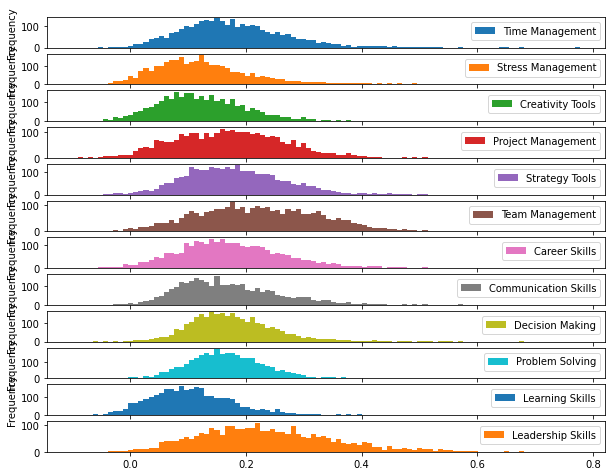

In [7]:
skills_df.plot.hist(subplots=True, bins=100, figsize=(10, 8));
plt.ylabel(None);

In [8]:
skills_df.min()

Time Management        -0.055910
Stress Management      -0.068870
Creativity Tools       -0.098996
Project Management     -0.094548
Strategy Tools         -0.046164
Team Management        -0.091429
Career Skills          -0.084244
Communication Skills   -0.075330
Decision Making        -0.062511
Problem Solving        -0.072518
Learning Skills        -0.099973
Leadership Skills      -0.060049
dtype: float64

In [9]:
skills_df.max()

Time Management         0.777002
Stress Management       0.640799
Creativity Tools        0.517459
Project Management      0.661074
Strategy Tools          0.506785
Team Management         0.716430
Career Skills           0.569913
Communication Skills    0.603043
Decision Making         0.679630
Problem Solving         0.509038
Learning Skills         0.656918
Leadership Skills       0.701939
dtype: float64

In [10]:
skills_df.mean()

Time Management         0.178674
Stress Management       0.131319
Creativity Tools        0.123959
Project Management      0.173231
Strategy Tools          0.180301
Team Management         0.223380
Career Skills           0.175989
Communication Skills    0.170482
Decision Making         0.176350
Problem Solving         0.165621
Learning Skills         0.109793
Leadership Skills       0.236992
dtype: float64

### Distribution per Provider

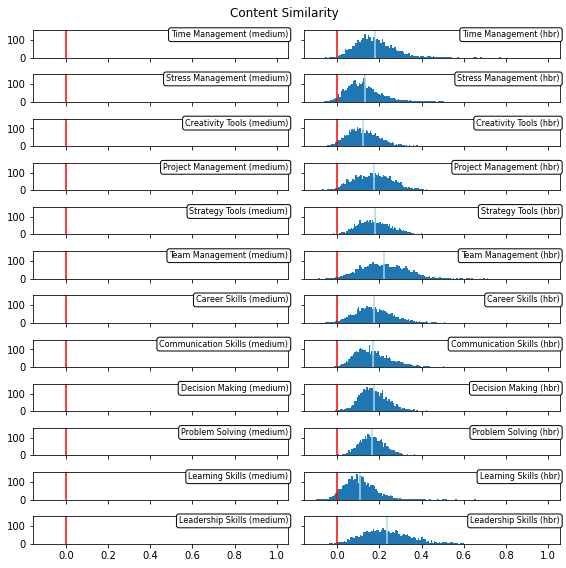

In [24]:
fig, axs = plt.subplots(len(skills_df.columns), 2, figsize=(8,8), sharex=True, sharey=True)
for i, provider in enumerate(['medium', 'hbr']):
    _df = df[lambda x: x.provider == provider].drop(columns=['provider'])
    for j, skill in enumerate(skills_df.columns):
        ax = axs[j, i]
        ax.hist(_df[skill], bins=100)
        ax.axvline(0.0, c="red")
        ax.axvline(_df[skill].mean(), c="lightblue")
        ax.annotate(f"{skill} ({provider})", xy=(1, 1), xycoords='axes fraction', fontsize=8, horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle='round', fc='w'))
fig.suptitle("Content Similarity")
fig.tight_layout();

### Distribution per Provider (with abs of negative values)

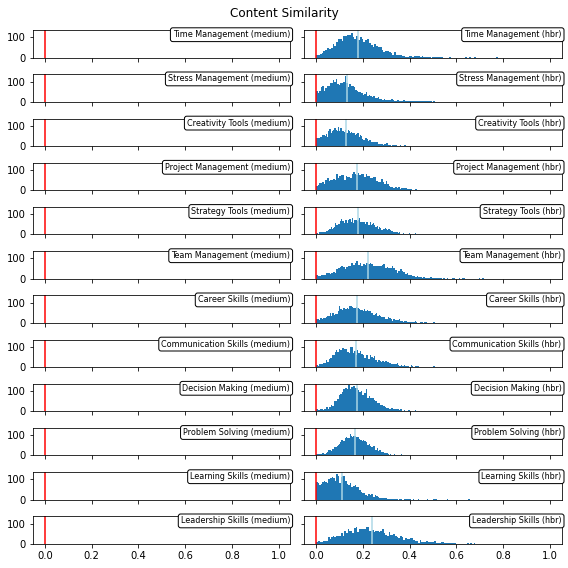

In [12]:
fig, axs = plt.subplots(len(skills_df.columns), 2, figsize=(8,8), sharex=True, sharey=True)
for i, provider in enumerate(['medium', 'hbr']):
    _df = df[lambda x: x.provider == provider].drop(columns=['provider'])
    for j, skill in enumerate(skills_df.columns):
        ax = axs[j, i]
        ax.hist(_df[skill].abs(), bins=100)
        ax.axvline(0.0, c="red")
        ax.axvline(_df[skill].abs().mean(), c="lightblue")
        ax.annotate(f"{skill} ({provider})", xy=(1, 1), xycoords='axes fraction', fontsize=8, horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle='round', fc='w'))
fig.suptitle("Content Similarity")
fig.tight_layout();

### Just for one skill

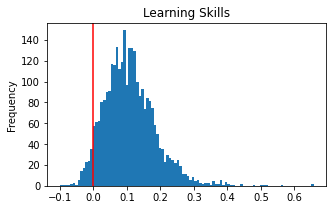

In [13]:
df['Learning Skills'].plot.hist(bins=100, figsize=(5,3), title="Learning Skills")
plt.gca().axvline(0.0, c="red");

## Ranking Analysis

In [14]:
def sort_by_skill(provider: str, skill: str, n=10, ascending=True, abs=False, titleContains=None):
    _df = df[lambda x: x.provider == provider][['title', skill]]
    if abs:
        _df[skill] = _df[skill].abs()
    _df = _df.sort_values(by=skill, ascending=ascending).reset_index(drop=True)
    if titleContains:
        _df = _df[lambda x: x.title.str.contains(titleContains, case=False)]
    return _df.head(n)

In [15]:
sort_by_skill("hbr", "Project Management", ascending=False, abs=False)

,title,Project Management
0,What PwC Learned from Its Policy of Flexible W...,0.661074
1,"Idolize Bill Gates, Not Steve Jobs",0.647992
2,Mumbai’s Models of Service Excellence,0.615696
3,Is U.S. Manufacturing Making a Comeback?,0.584767
4,Facebook’s Rebrand Has a Fundamental Problem,0.508062
5,An Innovative Approach to Funding CSR Projects,0.505953
6,How to Talk to an Employee Who Isn’t Meeting T...,0.494899
7,How Will You Measure Your Life?,0.488919
8,Carbon Might Be Your Company’s Biggest Financi...,0.485424
9,HR Goes Agile,0.477803


In [16]:
sort_by_skill("hbr", "Learning Skills", ascending=False)

,title,Learning Skills
0,What to Do When You're Caught in a Lie (Even a...,0.656918
1,Learning Is a Learned Behavior. Here's How to ...,0.656879
2,Twitch CEO on the Future of the Creator Econom...,0.559629
3,4 Elements of a Successful Brand Refresh,0.515535
4,Stop Making the Business Case for Diversity,0.506675
5,Listening Begins at Home,0.503370
6,6 Types of Resilience Companies Need Today,0.476184
7,Why I Hired an Executive with a Mental Illness,0.438458
8,Can AI Teach Us How to Become More Emotionally...,0.438264
9,Why You Should Have (at Least) Two Careers,0.417072


In [17]:
sort_by_skill("hbr", "Learning Skills", abs=True)

,title,Learning Skills
0,The Cybersecurity Risks of an Escalating Russi...,0.000039
1,More-Experienced Entrepreneurs Have Bigger Dea...,0.000075
2,The Uber-Waymo Lawsuit: It Should Be Easy to P...,0.000121
3,The Elements of a Good Company Apology,0.000202
4,"Strong Brands, Weak Pay",0.000249
5,Why People Really Quit Their Jobs,0.000392
6,"Global Supply Chains Are About to Get Better, ...",0.000424
7,When No One Retires,0.000531
8,Net Promoter 3.0,0.000561
9,Making Hospital Partnerships Work,0.000603


In [18]:
sort_by_skill("hbr", "Problem Solving")

,title,Problem Solving
0,Right Way to Manage Expats,-0.072518
1,The Factors That Lead to High CEO Pay,-0.066730
2,"Relax, Turn Off Your Phone, and Go to Sleep",-0.059922
3,Supporting Your Team's Mental Health After a V...,-0.052479
4,Learning to Learn,-0.034050
5,Lessons in Longevity from an 88-Year-Old Zippe...,-0.031461
6,Rx: Human Nature,-0.030693
7,Why Twitter’s Mission Statement Matters,-0.028843
8,We Need Better Carbon Accounting. Here’s How t...,-0.027773
9,Define Your Personal Brand With Simple Questions,-0.019202


### Filter by Title

In [19]:
sort_by_skill("hbr", "Learning Skills", titleContains="learning", n=50)

,title,Learning Skills
62,Learning to Learn,-0.019220
133,What Machine Learning Will Mean for Asset Mana...,-0.000816
181,Where Companies Go Wrong with Learning and Dev...,0.005135
245,Insights on Adapting to a Virtual Learning Env...,0.013232
395,Manage Your Organization as a Portfolio of Lea...,0.029537
409,Strategies for Learning from Failure,0.030997
607,Learning the Tricks of the Trade,0.047794
691,Sales Learning Curve,0.054039
770,How to Win with Machine Learning,0.059166
894,Build Learning into Your Employees’ Workflow,0.067178


In [20]:
sort_by_skill("hbr", "Time Management", titleContains="time management")

,title,Time Management
308,Time Management Is About More Than Life Hacks,0.074336
2279,How to Help an Employee Who Struggles with Tim...,0.240354


In [21]:
sort_by_skill("hbr", "Project Management", titleContains="project management")

,title,Project Management
1870,Five Critical Roles in Project Management,0.205488
2785,The Four Phases of Project Management,0.330775
